<a href="https://colab.research.google.com/github/sid1336/Computational-physics/blob/main/Exercise%204%20-%20intro%20to%20importance%20sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

utkarsh sachdeva (SID)
<br>
Date: Jan. 31, 2024
<br>
PHYS 2030 W24

# <center><font color=#46769B>Exercise 4: Introduction to importance sampling</font></center>

## <font color=#46769B>Introduction:</font>



In this exercise, our goals are:
- Gain familiarity with importance sampling
- Introduction to data-fitting

Required reading:
- *Lesson 4: Importance sampling*



## <font color=#46769B>Part (a): Introduction to importance sampling</font>

Try out importance sampling with a simple example:

- Target distribution $P(x)$ is a uniform distribution between $a=0$ and $b=3$. (Recall that the true mean and standard deviation of a uniform distribution is $\mu_P = (a+b)/2$ and $\sigma_P = (b-a)/\sqrt{12}$.)

- Take a normal distribution for your proposal distribution $Q(x)$, with mean $\mu_Q$ and standard deviation $\sigma_Q$. You are free to choose these values as you see fit.

Your tasks are as follows:

- Define $P(x)$ and $Q(x)$ as functions, i.e., using `def` statements.

- Draw $N=10^5$ samples from $Q(x)$. Calculate the weights $w = P(x)/Q(x)$ for each sample. Verify that the mean of the weights is approximately equal to one.

- Make a histogram plot that shows your unweighted and weighted samples on the same plot. Also include plots of $P(x)$ and $Q(x)$ as a function of $x$. Include a legend, $x$-axis label, `alpha=0.5` for your histograms, and choose a suitable number of bins. (Note: your unweighted samples should agree with $Q(x)$ and your weighted samples should agree with $P(x)$.)

- Define your own functions `weighted_mean(x,w)` and `weighted_std(x,w)` that take as inputs your samples for $x$ and the weights $w$ and returns the *weighted* mean and standard deviation, respectively. Do not use any numpy functions except `numpy.sum()`.

- Using your functions, calculate the weighted mean and standard deviation of your $x$ samples. Print your results and compare to the true values of the target distribution, $\mu_P$ and $\sigma_P$.


Mean of the weight is = 1.0023472280057757

The target distribution Mu_P = 1.5, Sigma_P = 0.8660254037844387

The weighted mean = 1.50060953318517, The weighted std = 0.864439027535547


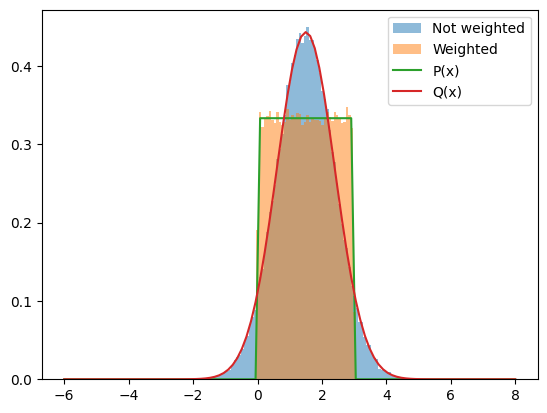

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_parameters(a, b):
    mu = (a + b) / 2
    sigma = (b - a) / np.sqrt(12)
    return mu, sigma

def P(x):
    return np.where((0 < x) & (x < 3), 1/3, 0)

def Q(x, mu, sigma):
    return 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-0.5 * (x - mu)**2 / sigma**2)

def generate_samples(mu, sigma, N):
    return np.random.normal(mu, sigma, N)

def weighted_mean(x, w):
    return np.sum(x * w) / len(x)

def weighted_std(x, w, mean):
    xs = np.sum(x**2 * w) / len(x)
    return np.sqrt(xs - mean**2)

def main():
    a, b = 0, 3
    mu_P, sigma_P = calculate_parameters(a, b)
    mu_Q = 1.5
    sigma_Q = 0.9
    N = 10**5
    x_samples = generate_samples(mu_Q, sigma_Q, N)
    w = P(x_samples) / Q(x_samples, mu_Q, sigma_Q)
    print(f'Mean of the weight is = {np.mean(w)}\n')
    plt.hist(x_samples, density=True, alpha=0.5, bins=100, label='Not weighted')
    plt.hist(x_samples, density=True, alpha=0.5, bins=100, weights=w, label='Weighted')

    x = np.linspace(-6, 8, 100)
    plt.plot(x, P(x), label='P(x)')
    plt.plot(x, Q(x, mu_Q, sigma_Q), label='Q(x)')
    Mw = weighted_mean(x_samples, w)
    Stdw = weighted_std(x_samples, w, Mw)
    print(f'The target distribution Mu_P = {mu_P}, Sigma_P = {sigma_P}\n')
    print(f'The weighted mean = {Mw}, The weighted std = {Stdw}')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()

## <font color=#46769B>Part (b): Neutron beta decay</font>

While neutrons found in nuclei are generally stable, a "free" neutron is not.
With a half-life for decay of around 10 minutes, a lone neutron will eventually decay through the process of nuclear $\beta$ decay.
In this process, the neutron ($n$) is converted into a proton ($p$), emitting an electron and a neutrino in the process. A lone proton, of course, is stable, making up the nucleus of a Hydrogen atom.
Schematically, the reaction is

$$n \to  p + e^- + \bar{\nu}_e \, ,$$

where $e^-$ is an electron and $\bar{\nu}_e$ is a *neutrino*. The neutrino is a nearly-massless particle that interacts very feebly. (To be more precise, $\bar{\nu}_e$ is an [electron antineutrino](https://en.wikipedia.org/wiki/Electron_neutrino). Their feebleness is why we do not perceive them readily in our day-to-day lives, despite the fact that the sun is bombarding us with trillions of neutrions every second.)

Here we will concern ourselves with the readily-observable electron that is emitted. The energy of the electron is described by a continuous distribution, known as the $\beta$-decay spectrum.<font color=red>$^1$</font>
The $\beta$-decay spectrum tells us the probability to observe an electron with a given energy $E$ is

$$P(E) = \left\{ \begin{array}{cl} A E \sqrt{E^2 - E_m^2} (E_{\rm max} - E)^2 & {\rm for} \; E_m \le E \le E_{\rm max} \\
0 & {\rm otherwise} \end{array} \right. \, , \qquad (1)$$

where the minimum electron energy is given by its rest mass energy $E_m = 0.511 \; {\rm MeV}$ and the maximum available energy is $E_{\rm max} = 1.292 \; {\rm MeV}$.<font color=red>$^2$</font>  
$A = 17.661$ is a normalizing constant.

Your tasks are as follows:

- Take a uniform proposal distribution $Q(E)$ that is constant in the domain $[E_m,E_{\rm max}]$ and zero otherwise. (Be sure your distribution is normalized correctly.)

- Generate $N = 10^5$ samples for $E$ from $Q(E)$.

- Calculate the weights $w = P(E)/Q(E)$ from your samples. Verify that the mean of the weights is approximately equal to one.

- Make a figure that shows:
    - Unweighted histogram of your samples for $E$ and a plot of $Q(E)$, which should agree.
    - Weighted histogram of your samples for $E$ and a plot of $P(E)$, which should agree.
    - Include a legend and $x$-axis label on your plot, and choose an appropriate number of bins and opacity (`alpha=0.5`) for your histogram.
    

### <font color=#46769B>Footnotes</font>

<font color=red>$^1$</font> Historically, the continuous energy distribution of electrons in $\beta$-decay was crucial puzzle in early particle physics. Before neutrinos were known, it was curious that the electron only possessed a *fraction* of the total available energy, seeming to violate conservation of energy. To rescue this cherished principle, Pauli postulated a new ["little neutral" particle](https://www.symmetrymagazine.org/article/march-2007/neutrino-invention) responsible for carrying away unseen that missing energy.
It took several decades before neutrinos were observed directly, finally confirming Pauli's hypothesis. Fast forward to now, neutrino studies and [neutrino factories](https://www.dunescience.org/) have become an integral part of our efforts to understand the fundamental building blocks of nature.


<font color=red>$^2$</font> We express energy in units of mega-electron-volts, where $1 \; {\rm MeV} = 10^6$ electron-volts $\approx 1.6 \times 10^{-13}\; {\rm Joules}$.


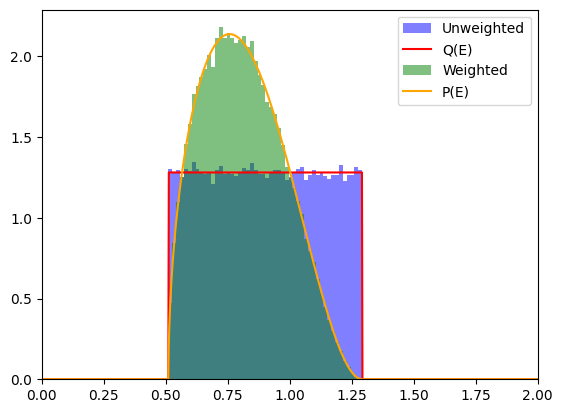

Weighted mean: 0.8125104403645503
Weighted sigma: 0.16280940287645754


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = 17.661
Emax = 1.292
Em = 0.511

def Q(E):
    mask = (E > Em) & (E < Emax)
    return np.where(mask, 1 / (Emax - Em), 0)

def P(E):
    mask = (E > Em) & (E < Emax)
    return np.where(mask, A * E * np.sqrt(np.abs(E**2 - Em**2)) * (Emax - E)**2, 0)

def plot_histogram(data, label, color, weights=None, bins=50):
    plt.hist(data, label=label, density=True, alpha=0.5, color=color, weights=weights, bins=bins)

def plot_function(func, label, color, x_range, num_points=1000):
    x = np.linspace(*x_range, num_points)
    plt.plot(x, func(x), label=label, color=color)

N_samples = 10**5
E = np.random.uniform(Em, Emax, N_samples)
w = P(E) / Q(E)

# Plot unweighted histogram
plot_histogram(E, "Unweighted", "blue")

# Plot Q(E)
plot_function(Q, "Q(E)", "red", (0, 2))

# Plot weighted histogram
plot_histogram(E, "Weighted", "green", weights=w)

# Plot P(E)
plot_function(P, "P(E)", "orange", (0, 2))

plt.xlim([0, 2])
plt.legend()
plt.show()

# Calculate weighted mean and sigma
weighted_mean = np.sum(w * E) / np.sum(w)
print('Weighted mean:', weighted_mean)

weighted_variance = np.sum(w * (E - weighted_mean)**2) / np.sum(w)
weighted_std = np.sqrt(weighted_variance)
print("Weighted sigma:", weighted_std)



## <font color=#46769B>Part (c): Data fitting</font>

Monte Carlo sampling is a really useful tool for fitting data. Let's illustrate the idea with a simple example.

Suppose we have 10 different (independent) measurements of the gravitational acceleration constant $g$. These are (in ${\rm m/s^2}$):

$$9.74 \pm 0.12,  \; 9.44 \pm 0.30,  \; 9.68 \pm 0.10, \; 10.02 \pm 0.38, \; 9.84 \pm 0.36, \;
        9.88 \pm 0.25,  \; 9.24 \pm 0.50,  \; 9.99 \pm 0.15,  \; 9.58 \pm 0.40,  \; 9.45 \pm 0.40 $$

How do you combine these different measurements to find the best value for $g$ (and its uncertainty)? Note the best value of $g$ is not simply the mean of all these measurements because the uncertainties are different, i.e., not all results for $g$ have equal weight. Intuitively, we expect that measurements with smaller uncertainties should carry more weight when determining the best value for $g$.

An often-used way to quantify goodness-of-fit is the __chi-squared__ (denoted $\chi^2$). That is, for each guess for $g$, we calculate the $\chi^2$ as

$$\chi^2(g) = \frac{(g - \mu_1)^2}{\sigma_1^2} + \frac{(g - \mu_2)^2}{\sigma_2^2} + \frac{(g - \mu_3)^2}{\sigma_3^2} + \dots
= \sum_a \frac{(g - \mu_a)^2}{\sigma_a^2} \qquad (1) $$

where $\mu_a$ and $\sigma_a$ denote the central values and uncertainties for the measurements listed above, i.e., $\mu_1 \pm \sigma_1 , \; \mu_2 \pm \sigma_2 , \; \mu_3 \pm \sigma_3 , \; {\rm etc.}$ are the measurements above and the index $a = 1,2,3, {\rm etc}$ labels the different measurements. The value of $g$ that minimizes the $\chi^2$ is the one that best fits the data.

Now we will show how to use Monte Carlo sampling (and importance sampling specifically) to minimize the $\chi^2$ to determine the best value of $g$ (and its error bar), step-by-step.  The steps are:

1. Define a proposal distribution $Q(g)$ of your choice. Generate $N$ samples for $g$ from $Q(g)$.

2. Define the target distribution $P(g)$ for your samples. The target distribution is related to the $\chi^2$ by

$$P(g) \propto e^{-\chi^2(g)/2}$$

3. Calculate the weights $w_i = P(g_i)/Q(g_i)$ for your samples $g_i$. (In practice, this formula will be modified, discussed below.)

4. The "best value" of $g$ is the weighted mean $\langle g \rangle$ and the uncertainty is the weighted standard deviation $\Delta g$.

Some comments:

- There are a few assumptions implicit defining $P(g)$ in terms of the $\chi^2$, which we won't discuss much. The most important one is that the measurements of $g$ are all *independent* from one another. If everyone is measuring $g$ with the same biased apparatus, that would not be independent.

- We don't know the overall constant for $P(g)$, which is fixed by requiring $\int dg \, P(g) = 1$ when integrated over all $g$ values.

To deal with the second point, we will consider the *unnormalized* PDF

$$P(g) = e^{-\tfrac{1}{2} \chi^2(g)} \, , \qquad (2)$$

such that $\int dg \, P(g) \ne 1$.
Now we need to change our formula for the weights so that the incorrect normalization factor for $P(g)$ cancels out:

$$w_i = \frac{ P(g_i)/Q(g_i) }{\frac{1}{N} \sum_j P(g_j)/Q(g_j) } \qquad (3) $$

Recall that if we had normalized $P(g)$ properly the term in the denominator would be (approximately) 1, and we would get back the usual formula. The following lines of code are what you need to do this:

```py
w_unnormalized = P(g)/Q(g)
w = w_unnormalized/np.mean(w_unnormalized)
```

Your tasks are as follows:

- Following the logic described above, use Monte Carlo sampling to compute the mean value and error for $g$ from the data given above (and print your result). Take $N = 10^5$ samples for $g$.

- Make a (weighted) histogram plot of your samples for $g$.

Note: You will need to sample $g$ from a proposal distribution $Q(g)$. Choose a normal distribution

$$Q(g) = \mathcal{N}(\mu_Q,\sigma_Q) $$

where $\mu_Q$ and $\sigma_Q$ here are numbers that *you pick* to get good results. They are *not* the same as the $\mu_g$ and $\sigma_g$, which are fixed arrays corresponding to the data.


Combined central value and uncertainty is 9.740716250614332 + - 0.06091289431057994


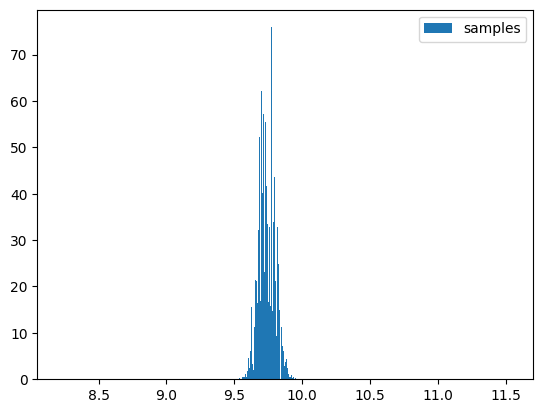

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mu_g = np.array([9.74, 9.44, 9.68, 10.02, 9.84, 9.88, 9.24, 9.99, 9.58, 9.45])
sigma_g = np.array([0.12, 0.30, 0.10, 0.38, 0.36, 0.25, 0.50, 0.15, 0.40, 0.40])

mu_Q = 9.8
sigma_Q = 0.5

def Q(g):
    return 1 / np.sqrt(2 * np.pi * sigma_Q**2) * np.exp(-0.5 * (g - mu_Q)**2 / sigma_Q**2)

N = 10**3
g = np.random.normal(mu_Q, sigma_Q, N)

def Q(g, mu_Q, sigma_Q):
    return 1 / np.sqrt(2 * np.pi * sigma_Q**2) * np.exp(-0.5 * (g - mu_Q)**2 / sigma_Q**2)

def chisquare(g, mu_g, sigma_g):
    return np.sum((g - mu_g)**2 / sigma_g**2)

def P(g, mu_g, sigma_g):
    return np.exp(-0.5 * chisquare(g, mu_g, sigma_g))

def calculate_weights(g, mu_g, sigma_g, mu_Q, sigma_Q):
    weights = []
    for i in range(len(g)):
        weight = P(g[i], mu_g, sigma_g) / Q(g[i], mu_Q, sigma_Q)
        weights.append(weight)
    return np.array(weights) / np.mean(weights)

weights = calculate_weights(g, mu_g, sigma_g, mu_Q, sigma_Q)

mean = np.mean(g * weights)
std = np.sqrt(np.mean(weights * g**2) - np.mean(weights * g)**2)

print("Combined central value and uncertainty is", mean, '+ -', std)

plt.hist(g, weights=weights, label="samples", bins=500)
plt.legend()
plt.show()